In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# AVERAGE WEIGHTED TECHNIQUE

In [2]:
df=pd.read_csv("clean_data.csv")

In [3]:
df.head(5)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Weight w is assigned to every movie which is (RV+CM)/(V+M)
R=RATING 0 TO 10
V=VOTES
C=MEAN VOTES
M=MIN VOTES FOR TAKING A PLACE IN TOP 250

In [4]:
v=df['vote_count']
C=df['vote_average'].mean()
R=df['vote_average']

In [5]:
C

6.092171559442011

In [6]:
v

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4798      238
4799        5
4800        6
4801        7
4802       16
Name: vote_count, Length: 4803, dtype: int64

In [7]:
import seaborn as sns

# Lets visualize distribution of votes

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote_count'>

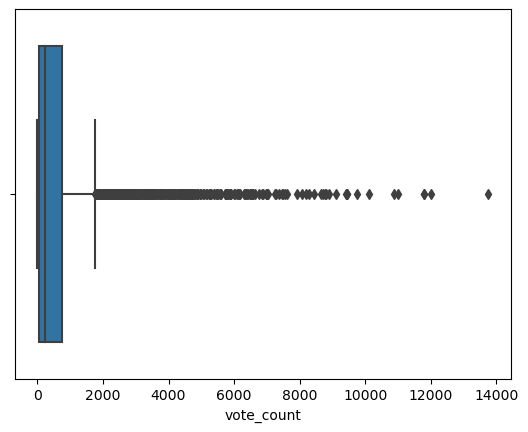

In [8]:
sns.boxplot(df['vote_count'])

THRESHOLD VALUE FROM THE GRAPH SEEMS TO BE 1900

In [9]:
m=df['vote_count'].quantile(0.9)

In [10]:
m

1838.4000000000015

# User defined function to compute weights

In [11]:
def weights(x,C=C,m=m):
    R=x['vote_average']
    v=x['vote_count']
    return (R*v+C*m)/(v+m)

In [12]:
data=df[df['vote_count']>1838]

In [13]:
data.head(10)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",The battle within.,5.9,3576,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",They're taking adventure to new lengths.,7.4,3330,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de..."
7,7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark trie

In [14]:
data.shape

(481, 19)

In [15]:
data['WEIGHTS']=data.apply(weights,axis=1)

C:\Users\Hi\AppData\Local\Temp\ipykernel_11472\2171846371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WEIGHTS']=data.apply(weights,axis=1)


In [16]:
data.shape

(481, 20)

In [17]:
data.head(10)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,WEIGHTS
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396
3,3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.346721
4,4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.096368
5,5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",The battle within.,5.9,3576,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...",5.965250
6,6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",They're taking adventure to new lengths.,7.4,3330,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de...",6.934805
7,7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",99861,"[{""id"": 8828, ""name"": ""marvel 

In [18]:
df_sorted=data.sort_values('WEIGHTS',ascending=False)

In [19]:
df_sorted.head(10)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,WEIGHTS
1881,1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Fear can hold you prisoner. Hope can set you f...,8.5,8205,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.059258
662,662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",1999-10-15,100853753,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mischief. Mayhem. Soap.,8.3,9413,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.939256
65,65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Why So Serious?,8.2,12002,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.920020
3232,3232,8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",1994-10-08,213928762,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Just because you are a character doesn't mean ...,8.3,8428,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",7.904645
96,96,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2010-07-14,825532764,148.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Your mind is the scene of the crime.,8.1,13752,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",7.863239
3337,3337,6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",238,"[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",1972-03-14,245066411,175.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",An offer you can't refuse.,8.4,5893,"[{""cast_id"": 5, ""character"": ""Don Vito Corleon...","[{""credit_id"": ""52fe422bc3a36847f80093c9"", ""de...",7.851236
95,95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mankind was born on Earth. It was never meant ...,8.1,10867,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",7.809479
809,809,55000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18

In [20]:
top_15=df_sorted[['original_title','vote_average','vote_count','WEIGHTS','popularity']].head(15)

In [21]:
top_15

,original_title,vote_average,vote_count,WEIGHTS,popularity
1881,The Shawshank Redemption,8.5,8205,8.059258,136.747729
662,Fight Club,8.3,9413,7.939256,146.757391
65,The Dark Knight,8.2,12002,7.920020,187.322927
3232,Pulp Fiction,8.3,8428,7.904645,121.463076
96,Inception,8.1,13752,7.863239,167.583710
3337,The Godfather,8.4,5893,7.851236,143.659698
95,Interstellar,8.1,10867,7.809479,724.247784
809,Forrest Gump,8.2,7927,7.803188,138.133331
329,The Lord of the Rings: The Return of the King,8.1,8064,7.727243,123.630332
1990,The Empire Strikes Back,8.2,5879,7.697884,78.517830


Text(0.5, 1.0, 'MOVIES VS WEIGHTS')

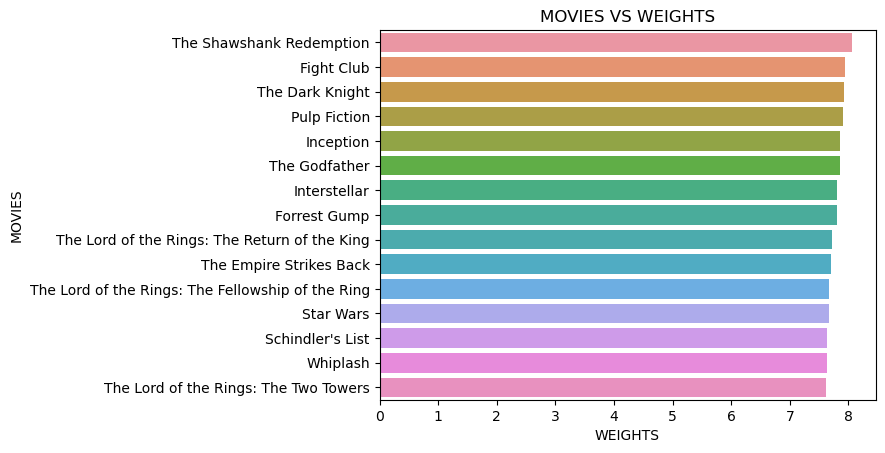

In [22]:
sns.barplot(y=top_15['original_title'],x=top_15['WEIGHTS'])
plt.xlabel("WEIGHTS")
plt.ylabel("MOVIES")
plt.title("MOVIES VS WEIGHTS")

# POPULARITY BASED RECOMMENDER SYSTEM

In [23]:
popularity=data.sort_values('popularity',ascending=False)

In [24]:
popularity.head(5)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,WEIGHTS
546,546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",2015-06-17,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Before Gru, they had a history of bad bosses",6.4,4571,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de...",6.311706
95,95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mankind was born on Earth. It was never meant ...,8.1,10867,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",7.809479
788,788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",2016-02-09,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Witness the beginning of a happy ending,7.4,10995,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de...",7.212652
94,94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",2014-07-30,773328629,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",All heroes start somewhere.,7.9,9742,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de...",7.613005
127,127,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",2015-05-13,378858340,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",What a Lovely Day.,7.2,9427,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de...",7.019214


In [25]:
top=popularity[['original_title','popularity','vote_average','vote_count']]

In [35]:
top

,original_title,popularity,vote_average,vote_count
546,Minions,875.581305,6.4,4571
95,Interstellar,724.247784,8.1,10867
788,Deadpool,514.569956,7.4,10995
94,Guardians of the Galaxy,481.098624,7.9,9742
127,Mad Max: Fury Road,434.278564,7.2,9427
...,...,...,...,...
101,X-Men: First Class,3.195174,7.1,5181
203,X2,2.871739,6.8,3506
508,The Lost World: Jurassic Park,2.502487,6.2,2487
2511,Home Alone,2.186927,7.1,2414


In [27]:
top.set_index('original_title')

,popularity,vote_average,vote_count
original_title,,,
Minions,875.581305,6.4,4571
Interstellar,724.247784,8.1,10867
Deadpool,514.569956,7.4,10995
Guardians of the Galaxy,481.098624,7.9,9742
Mad Max: Fury Road,434.278564,7.2,9427
...,...,...,...
X-Men: First Class,3.195174,7.1,5181
X2,2.871739,6.8,3506
The Lost World: Jurassic Park,2.502487,6.2,2487


<AxesSubplot:xlabel='popularity', ylabel='original_title'>

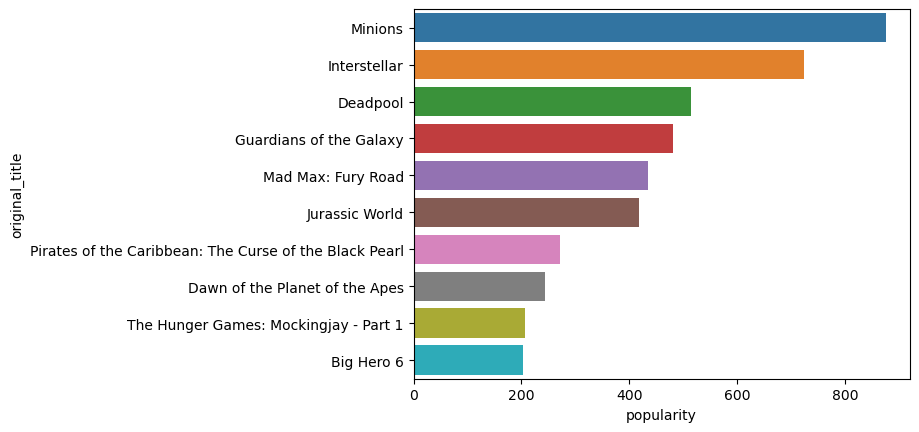

In [30]:
sns.barplot(x=top['popularity'][0:10],y=top['original_title'][0:10])

# CONSIDERING BOTH WEIGHT AND POPULARITY

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaling=MinMaxScaler()

In [36]:
popularity.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'WEIGHTS'],
      dtype='object')

In [37]:
popularity[['popularity','WEIGHTS']]

,popularity,WEIGHTS
546,875.581305,6.311706
95,724.247784,7.809479
788,514.569956,7.212652
94,481.098624,7.613005
127,434.278564,7.019214
...,...,...
101,3.195174,6.836047
203,2.871739,6.556517
508,2.502487,6.154170
2511,2.186927,6.664295


In [40]:
df_scaled=scaling.fit_transform(popularity[['popularity','WEIGHTS']])

In [41]:
popularity[['popularity_scaled','weights_scaled']]=df_scaled

In [42]:
popularity.columns

Index(['Unnamed: 0', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'WEIGHTS',
       'popularity_scaled', 'weights_scaled'],
      dtype='object')

# Creatin a new feature scored_mix based on popularity and weights equally

In [43]:
popularity['scored_mix']=popularity['popularity_scaled']*0.5+popularity['weights_scaled']*0.5

In [44]:
popularity['scored_mix'].head(5)

546    0.699064
95     0.870384
788    0.647617
94     0.697405
127    0.568358
Name: scored_mix, dtype: float64

In [48]:
popularity=popularity.sort_values(['scored_mix'],ascending=False)

In [49]:
popularity.head(5)

,Unnamed: 0,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,tagline,vote_average,vote_count,cast,crew,WEIGHTS,popularity_scaled,weights_scaled,scored_mix
95,95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mankind was born on Earth. It was never meant ...,8.1,10867,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",7.809479,0.826794,0.913974,0.870384
546,546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Before Gru, they had a history of bad bosses",6.4,4571,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de...",6.311706,1.000000,0.398128,0.699064
94,94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",All heroes start somewhere.,7.9,9742,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de...",7.613005,0.548503,0.846307,0.697405
788,788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Witness the beginning of a happy ending,7.4,10995,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de...",7.212652,0.586812,0.708422,0.647617
65,65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Why So Serious?,8.2,12002,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.920020,0.212268,0.952045,0.582157


In [51]:
popularity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 95 to 242
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            481 non-null    int64  
 1   budget                481 non-null    int64  
 2   genres                481 non-null    object 
 3   id                    481 non-null    int64  
 4   keywords              481 non-null    object 
 5   original_language     481 non-null    object 
 6   original_title        481 non-null    object 
 7   overview              481 non-null    object 
 8   popularity            481 non-null    float64
 9   production_companies  481 non-null    object 
 10  release_date          481 non-null    object 
 11  revenue               481 non-null    int64  
 12  runtime               481 non-null    float64
 13  spoken_languages      481 non-null    object 
 14  tagline               471 non-null    object 
 15  vote_average          

In [52]:
import plotly.express as px

In [55]:
px.bar(x=popularity['original_title'][0:10],y=popularity['scored_mix'][0:10])